In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
df = pd.read_csv('C:/Users/ajmof/OneDrive/Documents/UNCCHAR20180430DATA-Class-Repository-DATA/Rock_Hall-master/output/train.csv')
df.head()

,Unnamed: 0,Artist,Year Inducted,Years Waited,# of Years Nominated,Influenced,Certified Units (Millions),Albums in RS500,Top 100 Singles,Highest Position,Times on Cover of RS,Score,In_Out
0,0,The Beatles,1988.0,0,1,1230.0,178.0,10.0,80.0,1.0,16.0,4.81,1
1,1,Elvis Presley,1986.0,0,1,273.0,146.5,3.0,158.0,1.0,7.0,3.31,1
2,2,The Eagles,1998.0,0,1,17.0,120.0,2.0,21.0,1.0,3.0,3.50,1
3,3,Led Zeppelin,1995.0,0,1,355.0,111.5,5.0,10.0,4.0,12.0,4.50,1
4,4,Michael Jackson,2001.0,3,1,176.0,84.0,3.0,49.0,1.0,6.0,3.65,1


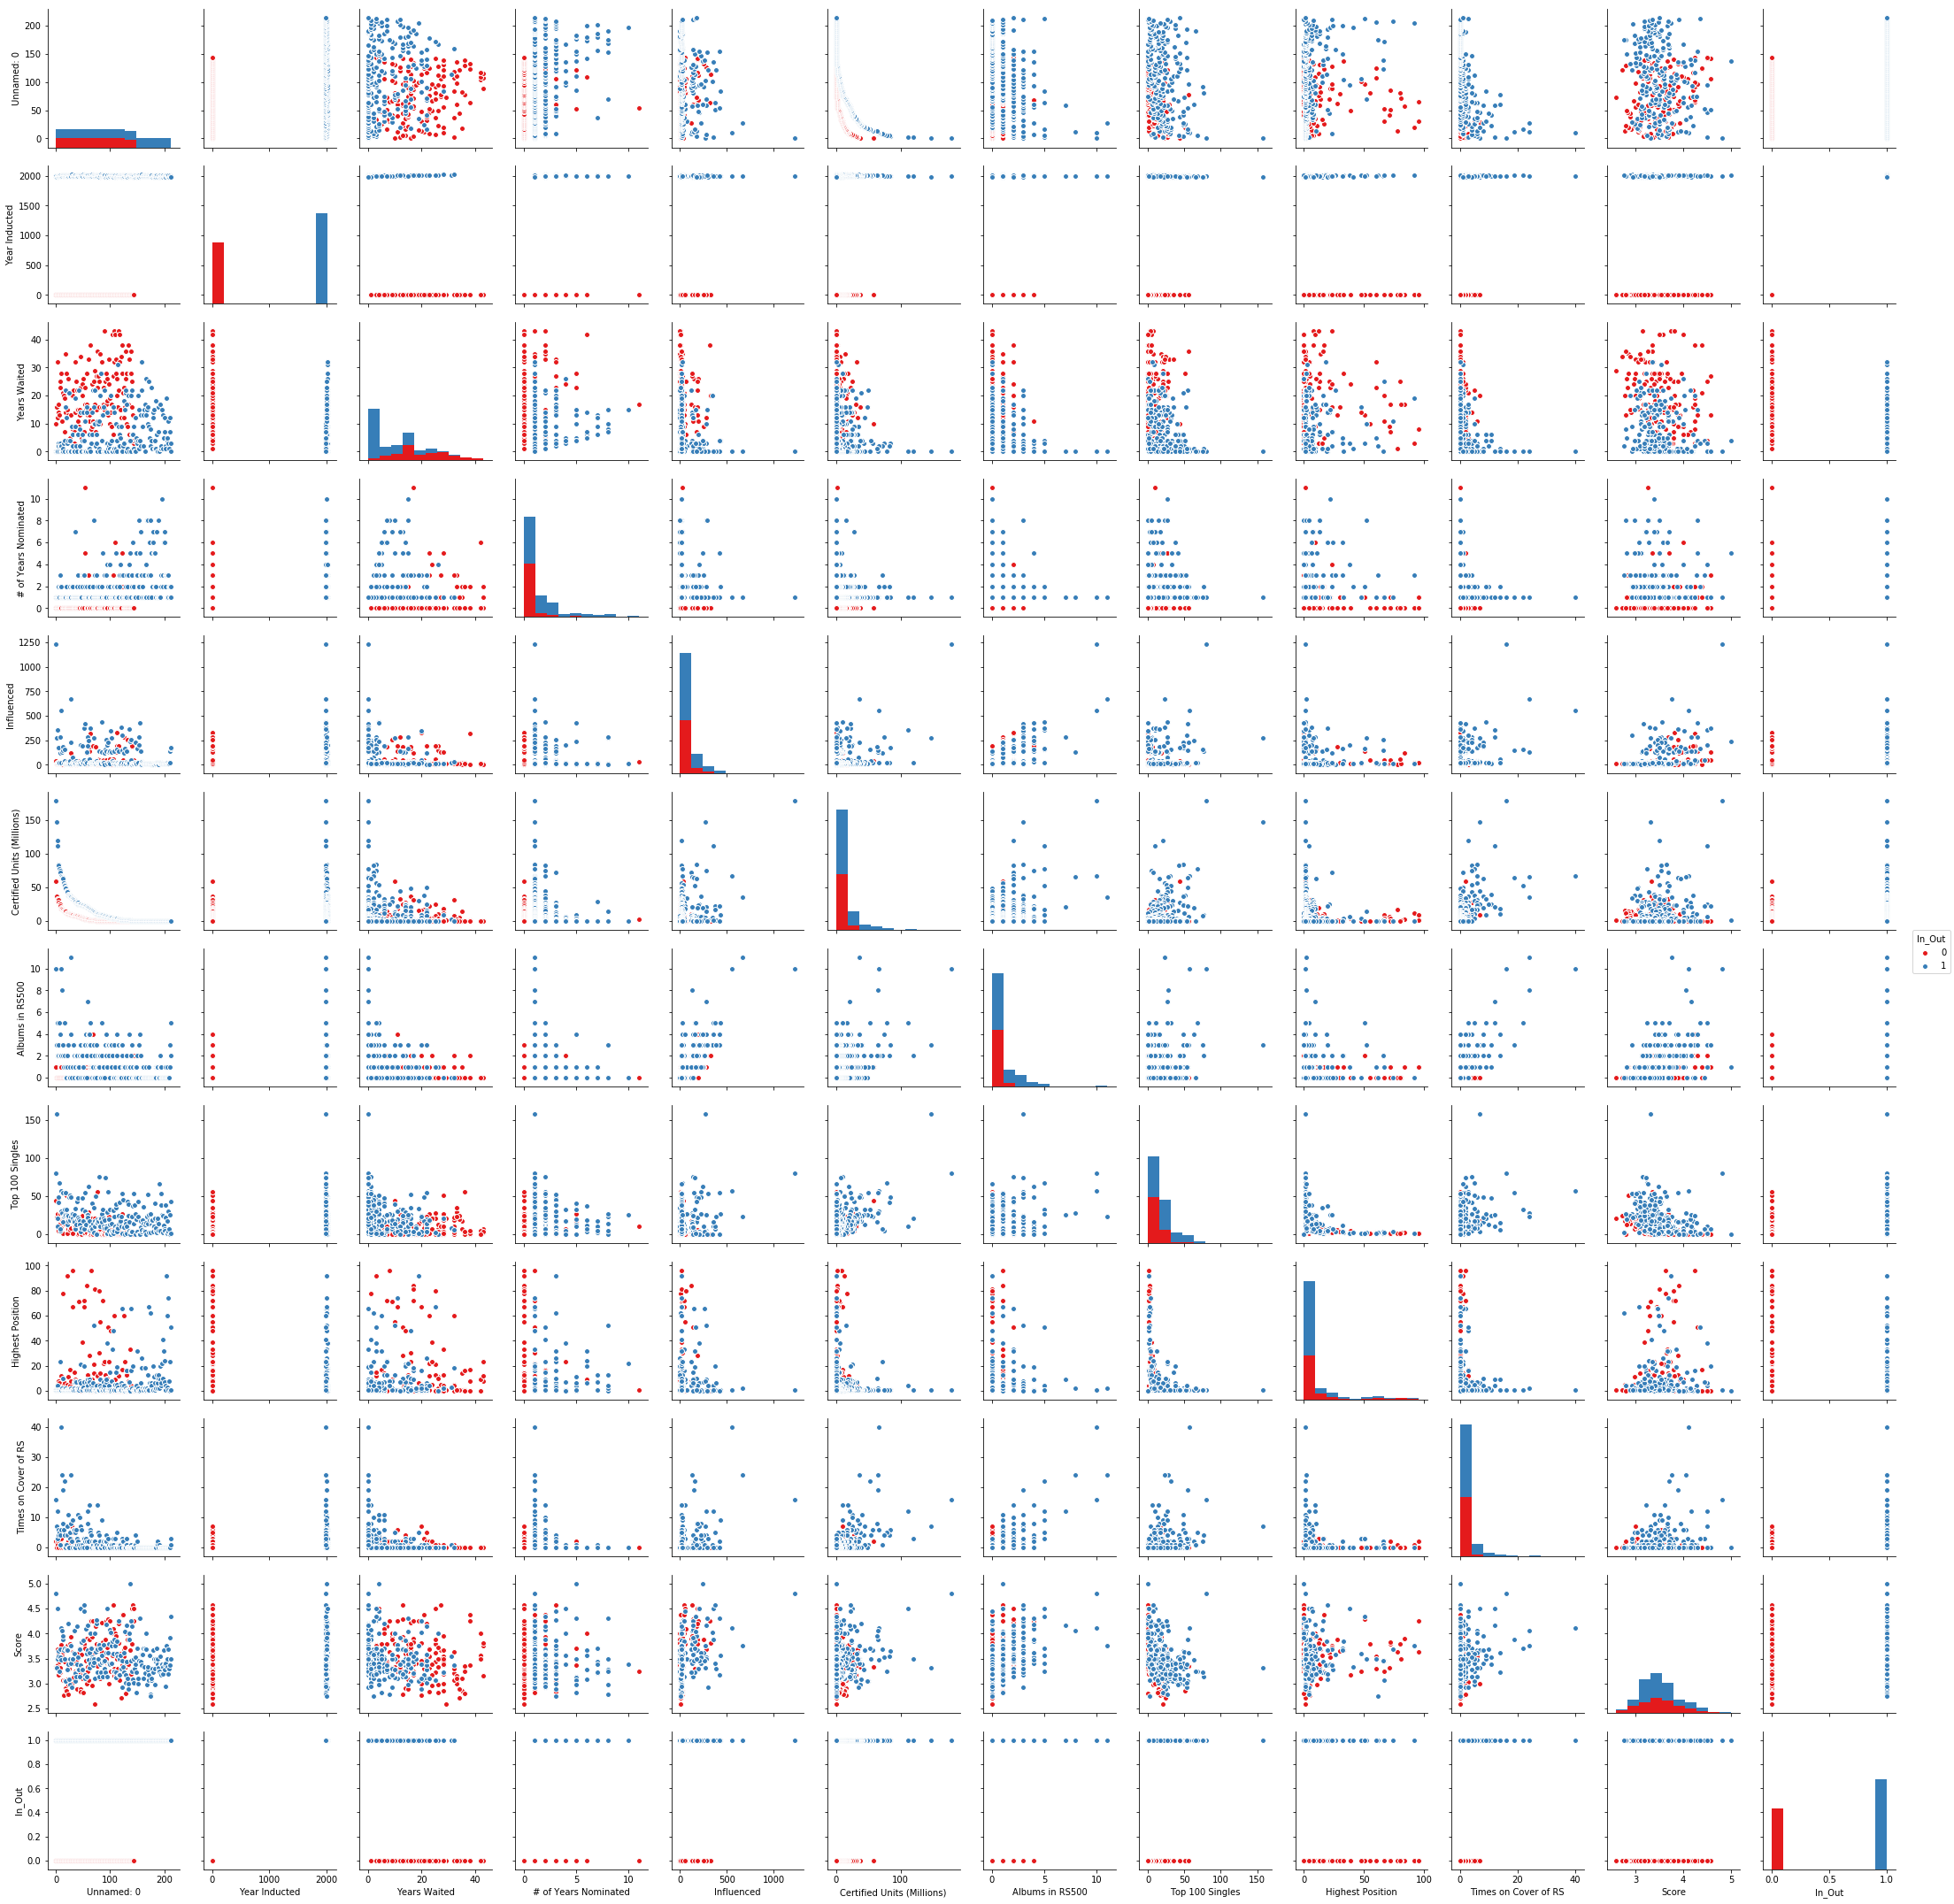

In [60]:
sns.pairplot(df,hue='In_Out',palette='Set1')

In [61]:
df.drop(['Unnamed: 0','Artist','Year Inducted','Years Waited'],axis=1,inplace=True)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X = df.drop('In_Out',axis=1)
y = df['In_Out']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dtree = DecisionTreeClassifier()

In [67]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [68]:
predictions = dtree.predict(X_test)

In [69]:
from sklearn.metrics import classification_report,confusion_matrix

In [70]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.58      0.92      0.71        36
          1       0.94      0.67      0.78        72

avg / total       0.82      0.75      0.76       108



In [71]:
print(confusion_matrix(y_test,predictions))

[[33  3]
 [24 48]]


In [72]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [73]:
rfc_pred = rfc.predict(X_test) 

In [74]:
print(confusion_matrix(y_test,rfc_pred))

[[32  4]
 [ 9 63]]


In [75]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.78      0.89      0.83        36
          1       0.94      0.88      0.91        72

avg / total       0.89      0.88      0.88       108



In [78]:
rfc.feature_importances_
a = zip(df.columns,rfc.feature_importances_)
list(a)

[('# of Years Nominated', 0.4262871164207099),
 ('Influenced', 0.09131489311416369),
 ('Certified Units (Millions)', 0.06756831582236),
 ('Albums in RS500', 0.06049836437189498),
 ('Top 100 Singles', 0.13213845494314733),
 ('Highest Position', 0.0874485513136563),
 ('Times on Cover of RS', 0.050168132959812886),
 ('Score', 0.0845761710542552)]